In [37]:
import pandas as pd
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('data/Boston.csv')
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2025-03-13,42.0,34.1,39.0,37.0,28.2,34.3,28.7,66.9,0.000,...,36.4,7,10,2025-03-13T06:59:03,2025-03-13T18:48:51,0.48,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
1,2025-03-14,47.0,40.0,43.0,44.2,35.2,39.8,34.5,71.9,0.000,...,17.3,6,10,2025-03-14T06:57:20,2025-03-14T18:50:01,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
2,2025-03-15,54.9,42.0,47.6,54.9,40.2,46.7,40.4,76.3,0.008,...,18.0,5,10,2025-03-15T06:55:37,2025-03-15T18:51:11,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
3,2025-03-16,63.8,50.8,58.4,63.8,50.8,58.4,50.8,76.0,0.047,...,4.6,2,10,2025-03-16T06:53:53,2025-03-16T18:52:21,0.58,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,NaN
4,2025-03-17,59.6,45.0,54.7,59.6,40.6,54.0,45.9,72.8,0.221,...,2.6,1,10,2025-03-17T06:52:10,2025-03-17T18:53:30,0.61,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN


In [25]:
df['datetime'] = pd.to_datetime(df['datetime'], format = "%Y-%m-%d")
df.set_index('datetime', inplace = True)
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2025-03-13,42.0,34.1,39.0,37.0,28.2,34.3,28.7,66.9,0.000,2.0,...,36.4,7,10,2025-03-13T06:59:03,2025-03-13T18:48:51,0.48,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
2025-03-14,47.0,40.0,43.0,44.2,35.2,39.8,34.5,71.9,0.000,4.0,...,17.3,6,10,2025-03-14T06:57:20,2025-03-14T18:50:01,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
2025-03-15,54.9,42.0,47.6,54.9,40.2,46.7,40.4,76.3,0.008,21.0,...,18.0,5,10,2025-03-15T06:55:37,2025-03-15T18:51:11,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN
2025-03-16,63.8,50.8,58.4,63.8,50.8,58.4,50.8,76.0,0.047,79.0,...,4.6,2,10,2025-03-16T06:53:53,2025-03-16T18:52:21,0.58,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,NaN
2025-03-17,59.6,45.0,54.7,59.6,40.6,54.0,45.9,72.8,0.221,91.0,...,2.6,1,10,2025-03-17T06:52:10,2025-03-17T18:53:30,0.61,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN


In [26]:
df1 = pd.read_csv("data/Boston.csv", index_col = "datetime", parse_dates = True)
df1.index

DatetimeIndex(['2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16',
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-22', '2025-03-23', '2025-03-24',
               '2025-03-25', '2025-03-26', '2025-03-27'],
              dtype='datetime64[ns]', name='datetime', freq=None)

<Axes: xlabel='datetime'>

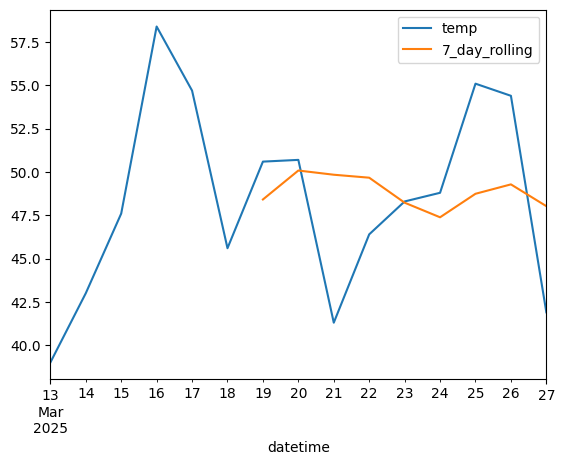

In [27]:
df['7_day_rolling'] = df['temp'].rolling(window = 7).mean()
df[['temp', '7_day_rolling']].loc['2025'].plot()

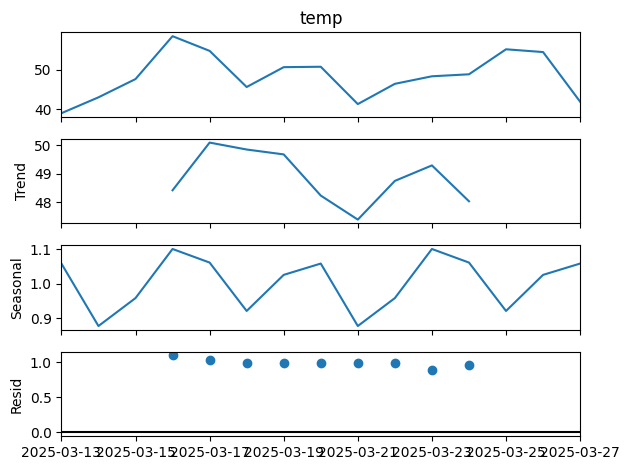

In [28]:
decomp = seasonal_decompose(df['temp'], model = 'multiplicative', period = 7)
fig = decomp.plot()

In [29]:
df[['temp','7_day_rolling']].corr()

,temp,7_day_rolling
temp,1.000000,-0.002916
7_day_rolling,-0.002916,1.000000


In [47]:
df = pd.read_csv('data/Boston_Year.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Boston,2024-01-01,38.1,28.9,33.3,34.8,22.7,27.9,23.2,66.4,...,4.4,3,10,2024-01-01T07:13:34,2024-01-01T16:21:58,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,AV085,72509854704,KBED,0518W,KBOS,7250901..."
1,Boston,2024-01-02,41.0,24.0,31.7,39.0,14.4,25.6,19.4,61.5,...,6.5,3,10,2024-01-02T07:13:39,2024-01-02T16:22:50,0.72,Clear,Clear conditions throughout the day.,clear-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,Boston,2024-01-03,42.2,30.5,36.6,40.5,21.9,31.0,27.0,68.3,...,6.1,4,10,2024-01-03T07:13:42,2024-01-03T16:23:44,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,Boston,2024-01-04,45.0,24.2,36.8,41.1,8.5,29.0,23.6,60.5,...,4.4,3,10,2024-01-04T07:13:42,2024-01-04T16:24:39,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,Boston,2024-01-05,34.1,20.9,27.3,25.0,5.6,15.8,10.6,49.4,...,6.8,4,10,2024-01-05T07:13:39,2024-01-05T16:25:36,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."


In [48]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace = True)
df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01,Boston,38.1,28.9,33.3,34.8,22.7,27.9,23.2,66.4,0.0,...,4.4,3,10,2024-01-01T07:13:34,2024-01-01T16:21:58,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,AV085,72509854704,KBED,0518W,KBOS,7250901..."
2024-01-02,Boston,41.0,24.0,31.7,39.0,14.4,25.6,19.4,61.5,0.0,...,6.5,3,10,2024-01-02T07:13:39,2024-01-02T16:22:50,0.72,Clear,Clear conditions throughout the day.,clear-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2024-01-03,Boston,42.2,30.5,36.6,40.5,21.9,31.0,27.0,68.3,0.0,...,6.1,4,10,2024-01-03T07:13:42,2024-01-03T16:23:44,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2024-01-04,Boston,45.0,24.2,36.8,41.1,8.5,29.0,23.6,60.5,0.0,...,4.4,3,10,2024-01-04T07:13:42,2024-01-04T16:24:39,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2024-01-05,Boston,34.1,20.9,27.3,25.0,5.6,15.8,10.6,49.4,0.0,...,6.8,4,10,2024-01-05T07:13:39,2024-01-05T16:25:36,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."


<Axes: xlabel='datetime'>

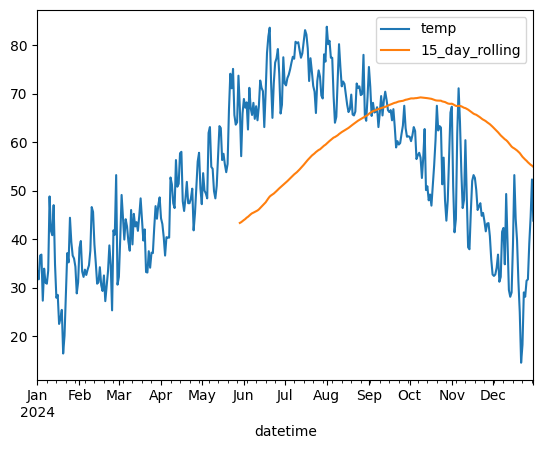

In [56]:
df['15_day_rolling'] = df['temp'].rolling(window = 150).mean()
df[['temp', '15_day_rolling']].loc['2024'].plot()

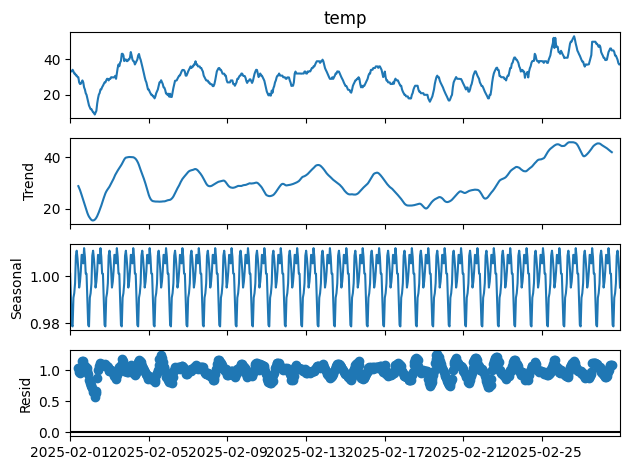

In [33]:
decomp = seasonal_decompose(df['temp'], model = 'multiplicative', period = 20)
fig = decomp.plot()

In [34]:
df[['temp','15_day_rolling']].corr()

,temp,15_day_rolling
temp,1.000000,0.833031
15_day_rolling,0.833031,1.000000


In [39]:
df = pd.read_csv('data/Boston_Year.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Boston,2024-01-01,38.1,28.9,33.3,34.8,22.7,27.9,23.2,66.4,...,4.4,3,10,2024-01-01T07:13:34,2024-01-01T16:21:58,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,AV085,72509854704,KBED,0518W,KBOS,7250901..."
1,Boston,2024-01-02,41.0,24.0,31.7,39.0,14.4,25.6,19.4,61.5,...,6.5,3,10,2024-01-02T07:13:39,2024-01-02T16:22:50,0.72,Clear,Clear conditions throughout the day.,clear-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,Boston,2024-01-03,42.2,30.5,36.6,40.5,21.9,31.0,27.0,68.3,...,6.1,4,10,2024-01-03T07:13:42,2024-01-03T16:23:44,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,Boston,2024-01-04,45.0,24.2,36.8,41.1,8.5,29.0,23.6,60.5,...,4.4,3,10,2024-01-04T07:13:42,2024-01-04T16:24:39,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,Boston,2024-01-05,34.1,20.9,27.3,25.0,5.6,15.8,10.6,49.4,...,6.8,4,10,2024-01-05T07:13:39,2024-01-05T16:25:36,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."


In [40]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace = True)
df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01,Boston,38.1,28.9,33.3,34.8,22.7,27.9,23.2,66.4,0.0,...,4.4,3,10,2024-01-01T07:13:34,2024-01-01T16:21:58,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,AV085,72509854704,KBED,0518W,KBOS,7250901..."
2024-01-02,Boston,41.0,24.0,31.7,39.0,14.4,25.6,19.4,61.5,0.0,...,6.5,3,10,2024-01-02T07:13:39,2024-01-02T16:22:50,0.72,Clear,Clear conditions throughout the day.,clear-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2024-01-03,Boston,42.2,30.5,36.6,40.5,21.9,31.0,27.0,68.3,0.0,...,6.1,4,10,2024-01-03T07:13:42,2024-01-03T16:23:44,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2024-01-04,Boston,45.0,24.2,36.8,41.1,8.5,29.0,23.6,60.5,0.0,...,4.4,3,10,2024-01-04T07:13:42,2024-01-04T16:24:39,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2024-01-05,Boston,34.1,20.9,27.3,25.0,5.6,15.8,10.6,49.4,0.0,...,6.8,4,10,2024-01-05T07:13:39,2024-01-05T16:25:36,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."


<Axes: xlabel='datetime'>

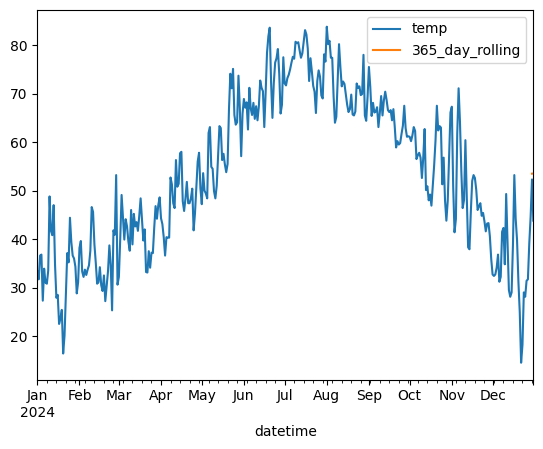

In [ ]:
decomp = seasonal_decompose(df['temp'], model = 'multiplicative', period = 365)
fig = decomp.plot()